For the degree of freedom $\kappa$, define the arrival time as 

$t_{in}\left(\kappa\right)=\int_{0}^{T}d\tau\theta\left(-g_{+}\left(\kappa,\tau\right)\right)$,

where the Lieb-Robinson metric is defined as

$g_{+}\left(\kappa,t\right)=\left\langle \kappa\right|\widehat{\rho}_{+}\left(t\right)\left|\kappa\right\rangle -a_{cut}$,

and the forward light cone density matrix is

$\widehat{\rho}_{+}\left(t\right)=\intop_{0}^{t}d\tau\left|\alpha\left(\tau\right)\right\rangle \left\langle \alpha\left(\tau\right)\right|$

Below we compute the arrival times for the chain sites. We begin with computing the forward light cone density matrix.

In [12]:
# import the required packages

import numpy as np
import lightcones.linalg as la
from lightcones import models
from lightcones.solvers.schrodinger import solve
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

In [13]:
# Treshold for the arrival of chain sites
a_cut = 10**(-5)

In [14]:
# compute the spread

n_sites = 20
# on-site energies
es = [1]*n_sites
# hoppings
hs = [0.05]*(n_sites-1)
H = la.tridiag(es, hs)

tmax = 100
dt = 0.01
t = np.arange(start = 0, stop = tmax, step = dt)
nt = t.size

phi_0 = np.zeros(n_sites, dtype = complex)
phi_0[0] = 1 # initially quantum is on the site 0

phi_lc = np.zeros((n_sites, nt), dtype = np.cdouble) # Here we store the propagated orbitals

def apply_h(ti, phi_in, phi_out):
    la.mv(H, phi_in, phi_out, cout=1)

def eval_o(ti, phi):
    phi_lc[:, ti] = phi
    
solve(0, nt-1, dt, apply_h, phi_0, eval_o = eval_o)

Now propagate $\widehat{\rho}_{+}\left(t\right)$ forward in time, and at the same time check the condition $g_{+}\left(\kappa,t\right)>0$ for the current chain site:

In [15]:
ti_arrival = [0]*n_sites

rho_lc = np.zeros((n_sites, n_sites), dtype = np.cdouble)

for i in range(nt):
    psi = la.as_column_vector(phi_lc[:, i])
    rho_lc += la.dyad(psi, psi) * dt

    for j in range(n_sites):
        g_metric = rho_lc[j, j] - a_cut
        inside_lightcone = g_metric > 0
        if not inside_lightcone:
            ti_arrival[j] += 1

t_arrival = np.array(ti_arrival) * dt

In [17]:
print(t_arrival)

[  0.     0.23   2.     5.56  10.4   16.11  22.43  29.19  36.29  43.66
  51.25  59.02  66.93  74.98  83.13  91.39  99.73 100.   100.   100.  ]


Text(0, 0.5, '$m_{+}\\left(t\\right)$')

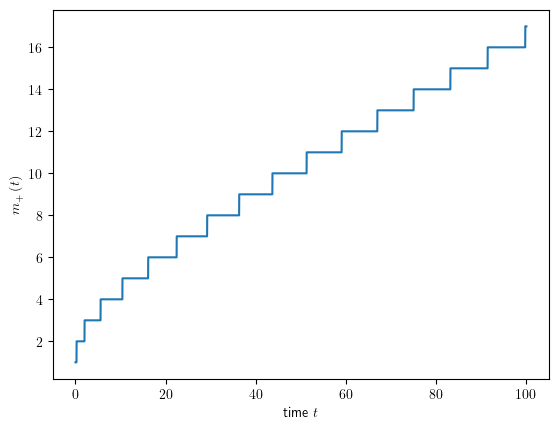

In [22]:
# Here we compute the "staircase" function of the number of arrived modes:

staircase = np.zeros(nt)
for i in range(len(t_arrival)):
    staircase[ti_arrival[i]:] += 1
    
# plot it 

plt.plot(t, staircase)
plt.xlabel(r"time $t$")
plt.ylabel(r"$m_{+}\left(t\right)$")

The arrival times are defined for arbitrary rotated basis:

$\widehat{\kappa}_{p}^{\dagger}=\sum_{q=0}^{\infty}\widehat{a}_{q}^{\dagger}U_{qp}$.

For the mode $\widehat{\kappa}_{p}^{\dagger}$, the corresponding arrival time is
$t_{in}\left(\kappa\right)=\int_{0}^{T}d\tau\theta\left(-g_{+}\left(\kappa,\tau\right)\right)$.

Therefore, we can consider the sequence of arrival times as a function of $U_{qp}$.

In particular, the rate at which the modes arrive is also a function of $U_{qp}$. 

Let us consider as an example the frame of normal modes of the chain: 

$H\left|\kappa_{p}\right\rangle =\varepsilon_{p}\left|\kappa_{p}\right\rangle$,

where

$
   H = \left[\begin{array}{cccc}
\varepsilon & h & 0 & \dots\\
h & \varepsilon & h & \dots\\
0 & h & \varepsilon & \dots\\
\vdots &  & \vdots & \ddots
\end{array}\right]
$ 

In [23]:
# find normal modes
H_ = H.todense()
e_p, kappa_p = la.find_largest_eigs(H_)

Now again propagate $\widehat{\rho}_{+}\left(t\right)$ forward in time, and at the same time check the condition $g_{+}\left(\kappa,t\right)>0$ for the normal modes $\kappa_p$:

In [26]:
ti_arrival_2 = [0]*n_sites

rho_lc = np.zeros((n_sites, n_sites), dtype = np.cdouble)

for i in range(nt):
    psi = la.as_column_vector(phi_lc[:, i])
    rho_lc += la.dyad(psi, psi) * dt

    for j in range(n_sites):
        g_metric = np.vdot(kappa_p[:, j], rho_lc @ kappa_p[:, j]) - a_cut
        inside_lightcone = g_metric > 0
        if not inside_lightcone:
            ti_arrival_2[j] += 1

t_arrival_2 = np.array(ti_arrival_2) * dt

In [27]:
print(t_arrival_2)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


We see that all the normal modes arrive inside the light cone already at $t=0$! 
This demonstrates that the rate at which the modes arrive inside the light cone depends dramatically on $U_{qp}$.